# Régression Polynomiale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [2]:
def model(X,theta):
    return X.dot(theta)

In [3]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)-y)**2)

In [4]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [5]:
def gradient_descent(X, y, theta, learning_rate, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(0, iterations):
        theta = theta - learning_rate * grad(X, y , theta)
        cost_history[i] = cost_function(X, y, theta)
        

    return theta, cost_history

In [6]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y -y.mean())**2).sum()
    return 1 - u/v

# Position_Salaires.csv

In [7]:
data = pd.read_csv("Data_Regression/Position_Salaires.csv")
data

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Gouverneur,6,150000
6,Associate,7,200000
7,Commercial,8,300000
8,C-level,9,500000
9,PDG,10,1000000


(10, 1)
[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
(10, 1)
[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


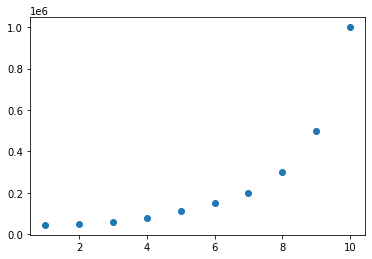

In [8]:
x = np.array(data["Level"]).reshape(10,1)
print(x.shape)
print(x)
y = np.array(data["Salary"]).reshape(10,1)
print(y.shape)
print(y)
plt.scatter(x,y)

In [9]:
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
X = np.hstack((x**3, X))
print(X.shape)
print(X)

(10, 4)
[[   1.    1.    1.    1.]
 [   8.    4.    2.    1.]
 [  27.    9.    3.    1.]
 [  64.   16.    4.    1.]
 [ 125.   25.    5.    1.]
 [ 216.   36.    6.    1.]
 [ 343.   49.    7.    1.]
 [ 512.   64.    8.    1.]
 [ 729.   81.    9.    1.]
 [1000.  100.   10.    1.]]


[[ 0.89363301]
 [ 0.05240244]
 [-0.47718701]
 [-0.05400105]]


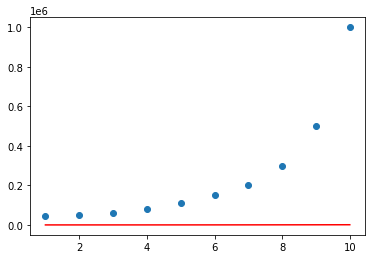

In [10]:
theta = np.random.randn(4,1)
print(theta)

plt.scatter(x,y)
plt.plot(x, model(X,theta), c='r')

In [11]:
iterations = 30
learning_rate = 0.000001

theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)
print(theta_final)

[[818.5996783 ]
 [ 81.14608736]
 [  8.13397725]
 [  1.14788846]]


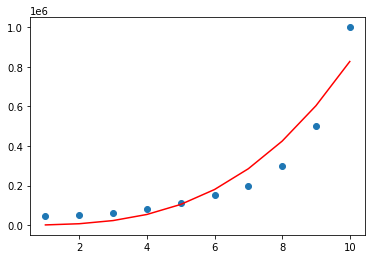

In [12]:
predictions = model(X, theta_final)

plt.scatter(x,y)
plt.plot(x, model(X, theta_final), c='r')

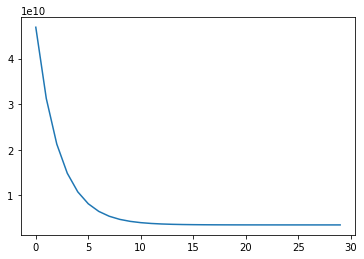

In [13]:
plt.plot(range(iterations), cost_history)

In [14]:
coef_determination(y, predictions)

0.9130350314506209

In [15]:
mse = mean_squared_error(y, predictions)
print(mse)

7014790034.372156


# Qualite_vin_rouge.csv

In [16]:
data_vin = pd.read_csv("Data_Regression/qualite_vin_rouge.csv")
data_vin

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [17]:
data_vin.corr()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
acidité fixe,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
acidité volatile,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
acide citrique,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
sucre résiduel,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorures,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
dioxyde de soufre libre,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
anhydride sulfureux total,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
densité,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [18]:
x_vin = data_vin['alcool'].values.reshape(-1,1)
y_vin = data_vin['qualité'].values.reshape(-1,1)
X_vin = np.hstack((x_vin, np.ones(x_vin.shape)))
X_vin = np.hstack((X_vin**2, X_vin))
print(X_vin.shape)
print(y_vin.shape)
print(theta_final.shape)

(1599, 4)
(1599, 1)
(4, 1)


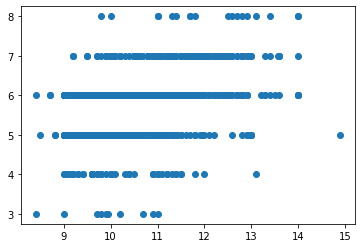

In [19]:
plt.scatter(x_vin,y_vin)

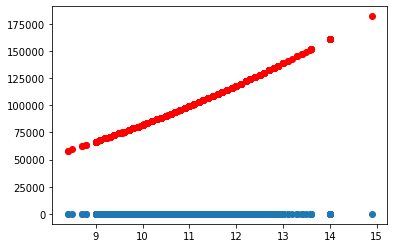

In [23]:
#iterations_vin = 30
#learning_rate_vin = 0.000001

#theta_final_vin, cost_history_vin = gradient_descent(X_vin, y_vin, theta, learning_rate_vin, iterations_vin)

pred_vin = model(X_vin, theta_final)

plt.scatter(x_vin,y_vin)
plt.scatter(x_vin, pred_vin, c='r')

In [24]:
coef_determination(y_vin, pred_vin)

-12988991334.386463

In [25]:
mse = mean_squared_error(y_vin, pred_vin)
print(mse)

8465712004.609426
